In [5]:
#pip install kmodes
#pip install --upgrade kmodes
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

In [6]:
customer_data = pd.read_csv('shopping_data.csv')  
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(customer_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 751.0
Run 1, iteration: 2/100, moves: 0, cost: 751.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 746.0
Run 2, iteration: 2/100, moves: 0, cost: 746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8, cost: 755.0
Run 3, iteration: 2/100, moves: 3, cost: 755.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 752.0
Run 4, iteration: 2/100, moves: 0, cost: 752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7, cost: 753.0
Run 5, iteration: 2/100, moves: 0, cost: 753.0
Best run was number 2


In [10]:
print(km.cluster_centroids_)

[['3' 'Female' '35' '54' '42']
 ['1' 'Male' '19' '54' '46']
 ['10' 'Female' '30' '78' '73']]


In [13]:
num_of_clusters = range(2,11)
error=[]

for num_clusters in num_of_clusters:
    km = KModes(num_clusters, init='Huang', n_init=5)
    clusters = km.fit_predict(customer_data)
    #clusters = KMeans(num_clusters)
    #clusters.fit(df_scld)
    #clusters.fit(x_train)
    error.append(km.cost_/100)
df = pd.DataFrame({"Cluster_Numbers": num_of_clusters, "Error_Term":error})
df

,Cluster_Numbers,Error_Term
0,2,7.59
1,3,7.51
2,4,7.36
3,5,7.33
4,6,7.15
5,7,7.08
6,8,6.88
7,9,6.90
8,10,6.85


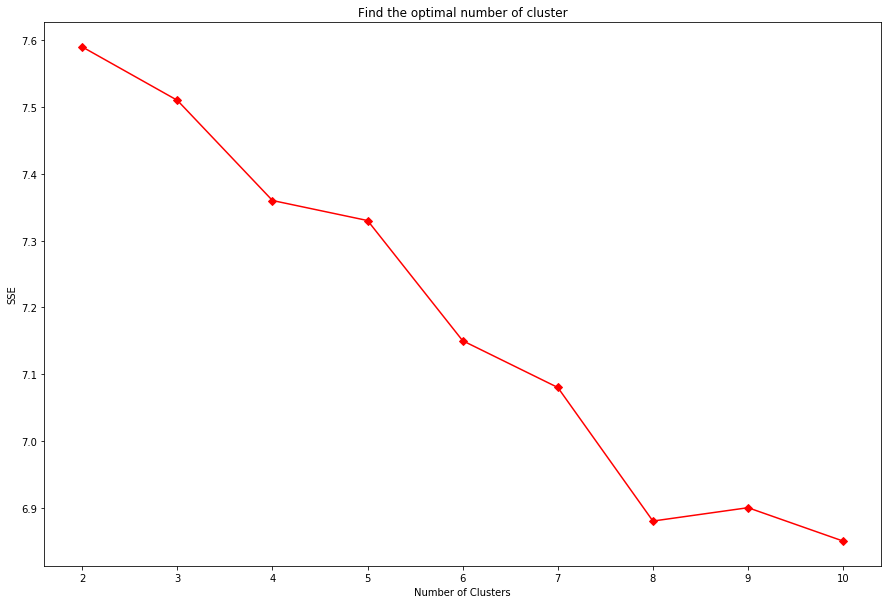

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df.Cluster_Numbers, df.Error_Term, marker = "D", color = 'red')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Find the optimal number of cluster')
plt.show()